In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import namedtuple

In [3]:
Dados = namedtuple("Dados", ['w', 'otimo', 'tabela'])

sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
def get_data(cat: int, size: int) -> Dados:
    path = "dataset/{}/knapPI_{}_{}_1000_1"

    with open(path.format("large_scale", cat, size), "r") as f:
        # Pega o resultado ótimo
        with open(path.format("large_scale-optimum", cat, size), "r") as g:
            otimo = int(g.read())
        
        get_line_values = lambda : list(map(int, f.readline().split()))

        # Primeira Linha: número de itens `n`e capacidade da mochila `w`
        n, w = get_line_values()

        # Próximas `n`linhas: valor e peso de cada item
        valores = np.zeros(n, dtype=np.int32)
        pesos = np.zeros(n, dtype=np.int32)

        for i in range(n):
            valores[i], pesos[i] = get_line_values()

        # Última linha: vetor de booleanos indicando quais itens compõe uma solução ótima
        solucao_otima = np.array(get_line_values(), dtype=np.bool8)

        df = pd.DataFrame({"valor": valores, "peso": pesos, "solucaoOtima": solucao_otima})
        
        return Dados(w, otimo, df)

### Abordagem Gulosa

##### Priorizando o número de items a serem inseridos

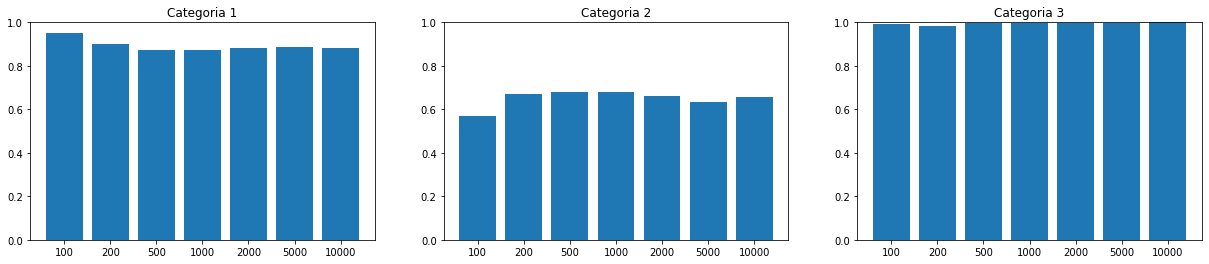

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(21, 4))

for cat in [1, 2, 3]:
    desempenho = []
    for size in sizes:
        w, otimo, df = get_data(cat, size)

        cur_v = 0
        cur_w = 0

        for i, item in df.sort_values(by="peso").iterrows():
            if (cur_w + item.peso) > w:
                break
            cur_w += item.peso
            cur_v += item.valor

        desempenho.append(cur_v/otimo)


    cv = ax[cat - 1]
    cv.bar([*map(str, sizes)], desempenho)
    cv.set_title(f"Categoria {cat}")
    cv.set_ylim(0, 1)


plt.show()


##### Priorizando os itens de melhor relação de benefício/custo

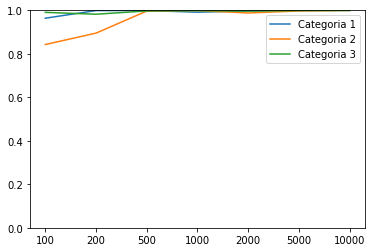

In [5]:
# fig, ax = plt.subplots(1, 3, figsize=(21, 4))
fig, ax = plt.subplots()

for cat in [1, 2, 3]:
    desempenho = []
    for size in sizes:
        w, otimo, df = get_data(cat, size)
        df["custoBeneficio"] = df.valor / df.peso

        cur_v = 0
        cur_w = 0
        for i, item in df.sort_values(by="custoBeneficio", ascending=False).iterrows():
            if (cur_w + item.peso) > w:
                break
            cur_w += item.peso
            cur_v += item.valor

        desempenho.append(cur_v / otimo)

    # cv = ax[cat - 1]
    # cv.bar([*map(str, sizes)], desempenho)

    # cv.set_ylim(0, 1)
    # cv.set_title(f"Categoria {cat}")
    cv = ax
    cv.plot([*map(str, sizes)], desempenho, label=f"Categoria {cat}")
    cv.set_ylim(0, 1)

plt.legend()
plt.show()


### Abordagem por Programação Dinâmica

In [29]:
capacidade, resultado_otimo, items = get_data(2, 100)
items: pd.DataFrame = items.sort_values("peso")


sub_problemas = items.copy().valor
for i in range(1, len(items)):
    item_atual = items.iloc[i]

    S = [
        sub_problemas[j]
        for j in range(i)
        if (item_atual.peso + items[j].peso <= capacidade)
    ]

    sub_problemas[items.index[i]] += max(
        [
            sub_problemas[idx]
            for idx, item in items.iloc[:i].iterrows()
            if (item.peso + item_atual.peso <= capacidade)
        ],
        default=0,
    )
    # print([
    # sub_problemas[idx]
    # (idx, item.peso, sub_problemas[idx])
    # for idx, item in items.iloc[:i].iterrows()
    # if (item.peso + item_atual.peso <= capacidade)
    # ])

print(sub_problemas.max(), resultado_otimo)

""" Item = namedtuple("Item", ["peso", "valor"])
items = [Item(*i) for i in [(14, 40), (5, 35), (28, 100), (7, 28)]]
items.sort()

# Cria subproblemas para cara item
sub_problemas = {item: item.valor for item in items}

for i in range(1, len(items)):
    item_atual = items[i]

    items_validos = [
        item
        for item in items[:i]  # pega os items mais leves que atual
        if item.peso + item_atual.peso <= capacidade  # os items devem caber na mochila
    ]

    # Adiciona o resultado do subproblema atual.
    # Nada mais é que o valor do item atual + o valor da melhor resposta do subproblema da iteração anterior
    sub_problemas[item_atual] += max(sub_problemas[item] for item in items_validos)
 """
print()


11735 1514

